In [19]:
import pyart
import matplotlib.pyplot as plt
from __future__ import print_function
import numpy as np
%matplotlib inline


In [4]:
infile = '/Users/scollis/Downloads/YMR151022050008.RAWY5NZ'
radar = pyart.io.read(infile)
radar_raw = pyart.io.read(infile, file_field_names=True)

In [5]:
print(radar.fields.keys())
print(radar_raw.fields.keys())

['velocity', 'spectrum_width', 'total_power', 'corrected_reflectivity', 'reflectivity']
['WIDTH', 'VEL', 'DBZ', 'DBT', 'DBZC']


In [16]:
nyq = radar.instrument_parameters['nyquist_velocity']['data']
print(nyq)
tilts = radar.fixed_angle['data']
print(tilts)

[ 12.03750038  12.03750038  12.03750038 ...,  12.03750038  12.03750038
  12.03750038]
[  0.49987793   0.99975586   1.99951172   2.99926758   3.99902344
   4.9987793    7.49816895   8.99780273  12.00256348  16.00158691
  20.00061035  23.99963379  27.99865723]


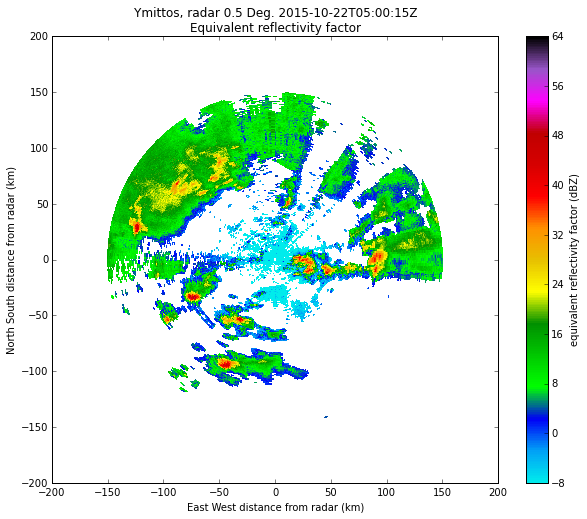

In [17]:
fig = plt.figure(figsize = [10,8])
display = pyart.graph.RadarDisplay(radar)
display.plot_ppi('reflectivity', vmin = -8, 
                 vmax = 64, cmap = pyart.graph.cm.NWSRef)

In [10]:
print(radar.latitude['data'], radar.longitude['data'])

[ 37.94611702] [ 23.81382007]


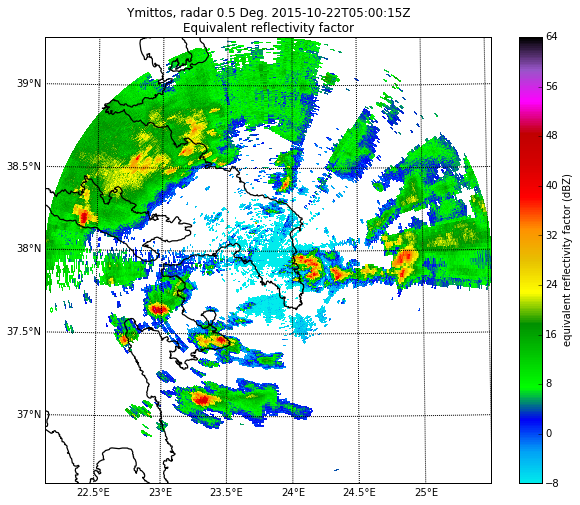

In [26]:
fig = plt.figure(figsize = [10,8])
map_display = pyart.graph.RadarMapDisplay(radar)
map_display.plot_ppi_map('reflectivity', 
                         vmin = -8, vmax = 64,
                        cmap = pyart.graph.cm.NWSRef,
                        lat_lines = np.arange(36,40,.5),
                        lon_lines = np.arange(20, 26, .5))

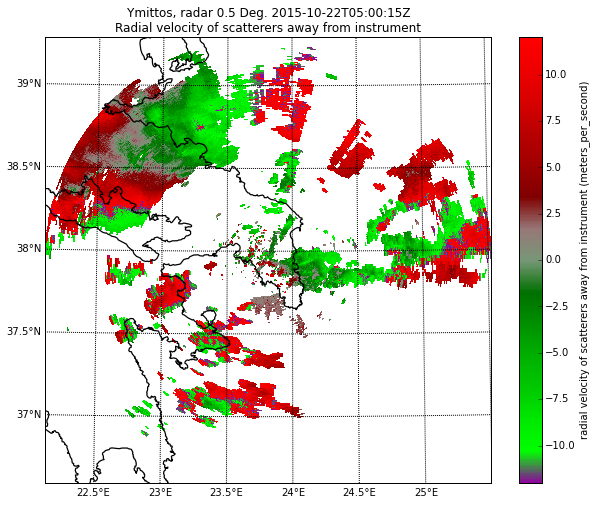

In [27]:
fig = plt.figure(figsize = [10,8])
map_display = pyart.graph.RadarMapDisplay(radar)
map_display.plot_ppi_map('velocity', 
                         vmin = -nyq[0], vmax = nyq[0],
                        cmap = pyart.graph.cm.NWSVel,
                        lat_lines = np.arange(36,40,.5),
                        lon_lines = np.arange(20, 26, .5))

In [31]:
gatefilter = pyart.correct.GateFilter(radar)
gatefilter.exclude_masked('velocity')
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, 
    gatefilter = gatefilter, nyquist_vel=nyq, centered = True)
radar.add_field('corrected_velocity', corr_vel, True)

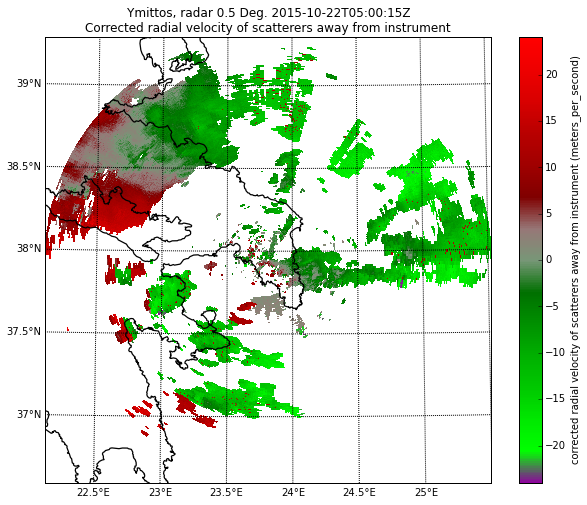

In [32]:
fig = plt.figure(figsize = [10,8])
map_display = pyart.graph.RadarMapDisplay(radar)
map_display.plot_ppi_map('corrected_velocity', 
                         vmin = -nyq[0]*2.0, vmax = nyq[0]*2.0,
                        cmap = pyart.graph.cm.NWSVel,
                        lat_lines = np.arange(36,40,.5),
                        lon_lines = np.arange(20, 26, .5))